In [1]:
print("all ok")

all ok


In [2]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: c:\MY_Folder\LLMOPS_GIT_Projects\LIVE_LLMOPS\automated-research-report-generation


In [3]:
from dotenv import load_dotenv
from research_and_analyst.utils.model_loader import ModelLoader
model_loader = ModelLoader()

{"timestamp": "2025-10-18T06:01:45.053560Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-10-18T06:01:45.055376Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-18T06:01:45.056699Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-18T06:01:45.058251Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-18T06:01:45.059680Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-18T06:01:45.064893Z", "level": "info", "event": "ASTRA_DB_KEYSPACE loaded from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-18T06:01:45.085453Z", "level": "info", "event": "YAML config loaded"}


In [4]:
llm = model_loader.load_llm()

{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-10-18T06:01:45.098373Z", "level": "info", "event": "Loading LLM"}


In [5]:
llm.invoke("hi").content

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'Hello! How can I assist you today?'

In [15]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage , SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

### health

- `Analyst-1`


Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

- `Analyst-2`


Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),

- `Analyst-3`


Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [11]:
#Pydantic Base Model
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [12]:
# Example of analyst
anslyst1 = Analyst(
    name = "Sunny",
    role = "Genai Eng",
    affiliation = "AI Research LAB",
    description = "I am genai Devloper as well as mentor"

)

print(anslyst1.persona)


Name: Sunny
Role: Genai Eng
Affiliation: AI Research LAB
Description: I am genai Devloper as well as mentor



In [13]:
#Pydantic Base Model
class Perspectives(BaseModel):
       analysts: List[Analyst] = Field(
              description  =  "Comprehensive list of analysts with their roles and affiliations."
              )

In [16]:
#Define the Class 
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [ ]:
## This is TypedDict class , return the result as string
GenerateAnalystsState(
    topic = "finance",
    max_analysts = 5,
    human_analyst_feedback = "give the real info"
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [ ]:
def create_analyst(state:GenerateAnalystsState):
    """
    It is Creating my analyst
    """
    topic = state["topic"]
    max_analyst = state['max_analyst']
    human_analyst_feedback = state.get["human_analyst_feedback",""] #this is typed Dict , return as dict
    llm.with_structured_output(Perspectives)
    


In [26]:
def human_feedback(state):
    """_summary_ 

    Args:
        state (_type_): _description_
    """
    pass

In [27]:
def should_continue(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [28]:
builder = StateGraph(GenerateAnalystsState)
## Add Nodes
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)
## Add the edges
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                        should_continue,["create_analyst",END])
## Memory Saver
memory = MemorySaver()

## Build the graph
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

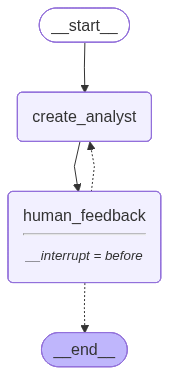

In [29]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))